## Módulos usados durante o código:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

RANDOM_SEED = 42

## Carregando os datasets:

In [18]:
complete_data_train = pd.read_csv("complete_data_train.csv")

complete_data_test = pd.read_csv("complete_data_test.csv")

## Pegando a ordem das categorias:

In [19]:
def enumerate(dataset):
    classes = []
    
    for classe in dataset.label:
        if classe not in classes:
            classes.append(classe)
            
    return classes

classes = enumerate(complete_data_train)
print(classes)

['Hi-hat', 'Saxophone', 'Trumpet', 'Glockenspiel', 'Cello', 'Knock', 'Gunshot_or_gunfire', 'Clarinet', 'Computer_keyboard', 'Keys_jangling', 'Snare_drum', 'Writing', 'Laughter', 'Tearing', 'Fart', 'Oboe', 'Flute', 'Cough', 'Telephone', 'Bark', 'Chime', 'Bass_drum', 'Bus', 'Squeak', 'Scissors', 'Harmonica', 'Gong', 'Microwave_oven', 'Burping_or_eructation', 'Double_bass', 'Shatter', 'Fireworks', 'Tambourine', 'Cowbell', 'Electric_piano', 'Meow', 'Drawer_open_or_close', 'Applause', 'Acoustic_guitar', 'Violin_or_fiddle', 'Finger_snapping']


## Definindo as features a serem usadas e quais as colunas com as categorias:

In [20]:
x_train = complete_data_train[['F_1Q', 'F_2Q', 'F_IQR', 'F_max', 'F_mean', 'F_median',
       'F_min', 'F_std', 'SC_1Q', 'SC_2Q', 'SC_IQR', 'SC_max', 'SC_mean',
       'SC_median', 'SC_min', 'SC_std', 'SContr_1Q', 'SContr_2Q', 'SContr_IQR',
       'SContr_max', 'SContr_mean', 'SContr_median', 'SContr_min',
       'SContr_std', 'SF_1Q', 'SF_2Q', 'SF_IQR', 'SF_max', 'SF_mean',
       'SF_median', 'SF_min', 'SF_std', 'h1Q', 'h2Q',
       'hIQR', 'hmax', 'hmean', 'hmedian', 'hmin', 'hstd', 'htempo', 'p1Q',
       'p2Q', 'pIQR', 'pmax', 'pmean', 'pmedian', 'pmin', 'pstd', 'ptempo', 'M_median', 'M_mean', 'M_1Q', 'M_2Q', 'M_IQR',
       'M_min', 'M_max', 'M_std']]

y_train = complete_data_train['label']

x_test = complete_data_test[['F_1Q', 'F_2Q', 'F_IQR', 'F_max', 'F_mean', 'F_median',
       'F_min', 'F_std', 'SC_1Q', 'SC_2Q', 'SC_IQR', 'SC_max', 'SC_mean',
       'SC_median', 'SC_min', 'SC_std', 'SContr_1Q', 'SContr_2Q', 'SContr_IQR',
       'SContr_max', 'SContr_mean', 'SContr_median', 'SContr_min',
       'SContr_std', 'SF_1Q', 'SF_2Q', 'SF_IQR', 'SF_max', 'SF_mean',
       'SF_median', 'SF_min', 'SF_std', 'h1Q', 'h2Q',
       'hIQR', 'hmax', 'hmean', 'hmedian', 'hmin', 'hstd', 'htempo', 'p1Q',
       'p2Q', 'pIQR', 'pmax', 'pmean', 'pmedian', 'pmin', 'pstd', 'ptempo', 'M_median', 'M_mean', 'M_1Q', 'M_2Q', 'M_IQR',
       'M_min', 'M_max', 'M_std']]

y_test = complete_data_test['label']

## Realizando o Feature Scaling:

In [21]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Criando o modelo KNN e determinando sua acurácia:

#### Obter melhor K a partir do método de 10-fold cross validation e estimativas

In [22]:
from sklearn.model_selection import cross_val_score
neighbors = list(range(1,50))

cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


MSE = [1 - x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print(optimal_k)

1


In [23]:
# Criando o modelo:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance')

# Dando fit no modelo:
knn_model.fit(x_train, y_train)

# Realizando a classificação:
y_knn = knn_model.predict(x_test)

# Calculando a acurácia:
knn_acc = acc(y_test, y_knn)

# Printando os resultados:
print("Acurácia KNN: {0}%".format(knn_acc * 100))

Acurácia KNN: 53.5%


### Matriz de confusão para o KNN:

Text(0.5,0,'Predicted label')

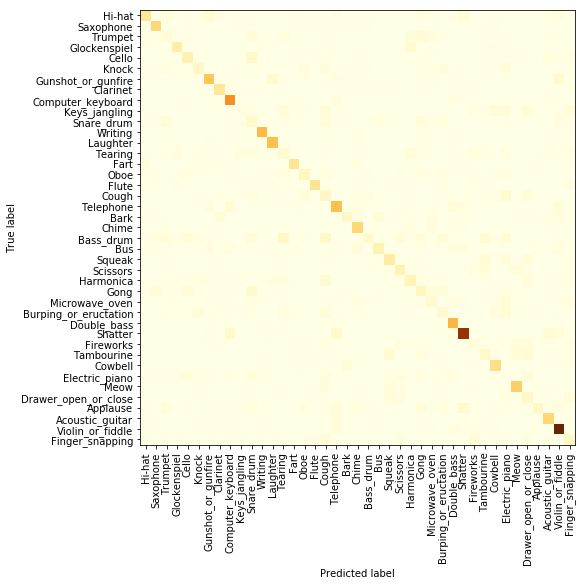

In [24]:
cm = confusion_matrix(y_test, y_knn)

plt.figure(figsize=(8, 8))

plt.imshow(cm, cmap=plt.cm.YlOrBr);

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

## Criando o modelo Random Forest e determinando sua acurácia:

In [25]:
# Criando o modelo:
rf_model = RandomForestClassifier(max_depth = 20, n_estimators=100, criterion='entropy')

# Dando fit no modelo:
rf_model.fit(x_train, y_train)

# Realizando a classificação:
y_rf = rf_model.predict(x_test)

# Calculando a acurácia:
rf_acc = acc(y_test, y_rf)

# Printando os resultados:
print("Acurácia RF: {0}%".format(rf_acc * 100))

Acurácia RF: 62.5%


In [26]:
y_rf_train = rf_model.predict(x_train)
rf_acc_train = acc(y_train, y_rf_train)
rf_acc_train

1.0

### Matriz de confusão para o Random Forest:

Text(0.5,0,'Predicted label')

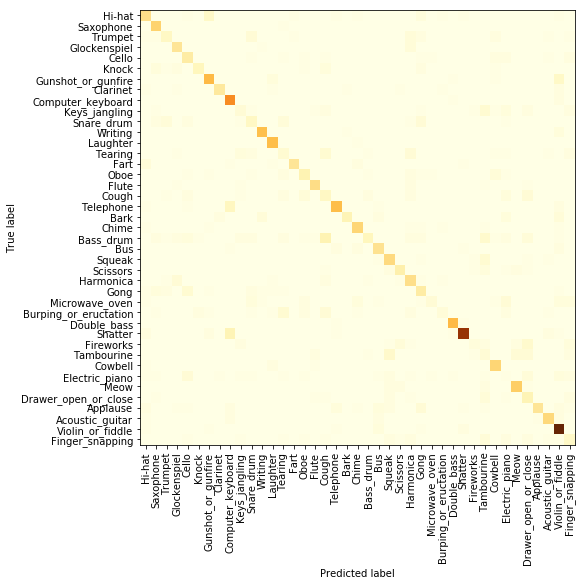

In [27]:
cm = confusion_matrix(y_test, y_rf)

plt.figure(figsize=(8, 8))

plt.imshow(cm, cmap=plt.cm.YlOrBr);

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Testes no modelo Random Forest para seleção de features

In [28]:
lista = ['F_1Q', 'F_2Q', 'F_IQR', 'F_max', 'F_mean', 'F_median',
           'F_min', 'F_std', 'SC_1Q', 'SC_2Q', 'SC_IQR', 'SC_max', 'SC_mean',
           'SC_median', 'SC_min', 'SC_std', 'SContr_1Q', 'SContr_2Q', 'SContr_IQR',
           'SContr_max', 'SContr_mean', 'SContr_median', 'SContr_min',
           'SContr_std', 'SF_1Q', 'SF_2Q', 'SF_IQR', 'SF_max', 'SF_mean',
           'SF_median', 'SF_min', 'SF_std', 'h1Q', 'h2Q',
           'hIQR', 'hmax', 'hmean', 'hmedian', 'hmin', 'hstd', 'htempo', 'p1Q',
           'p2Q', 'pIQR', 'pmax', 'pmean', 'pmedian', 'pmin', 'pstd', 'ptempo', 'M_median', 'M_mean', 'M_1Q', 'M_2Q', 'M_IQR',
       'M_min', 'M_max', 'M_std']





from sklearn.linear_model import LogisticRegression

lmodel = LogisticRegression(penalty="l1", C=1e-2)

lmodel.fit(x_train, y_train)
yl = lmodel.predict(x_test)
lacc = acc(y_test, yl)

lista_real = []

for coluna, coef in zip(lista, lmodel.coef_[1]):
    if coef != 0:
        lista_real.append(coluna)

x_train_2 = complete_data_train[lista_real]
y_train_2 = complete_data_train['label']

x_test_2 = complete_data_test[lista_real]
y_test_2 = complete_data_test['label']



#Combinação das features com relevância acima de zero para todas classes.
porcet = {}
for i in range(41):
    lista = ['F_1Q', 'F_2Q', 'F_IQR', 'F_max', 'F_mean', 'F_median',
           'F_min', 'F_std', 'SC_1Q', 'SC_2Q', 'SC_IQR', 'SC_max', 'SC_mean',
           'SC_median', 'SC_min', 'SC_std', 'SContr_1Q', 'SContr_2Q', 'SContr_IQR',
           'SContr_max', 'SContr_mean', 'SContr_median', 'SContr_min',
           'SContr_std', 'SF_1Q', 'SF_2Q', 'SF_IQR', 'SF_max', 'SF_mean',
           'SF_median', 'SF_min', 'SF_std', 'h1Q', 'h2Q',
           'hIQR', 'hmax', 'hmean', 'hmedian', 'hmin', 'hstd', 'htempo', 'p1Q',
           'p2Q', 'pIQR', 'pmax', 'pmean', 'pmedian', 'pmin', 'pstd', 'ptempo', 'M_median', 'M_mean', 'M_1Q', 'M_2Q', 'M_IQR',
       'M_min', 'M_max', 'M_std']

    lista_real = []

    for coluna, coef in zip(lista, lmodel.coef_[i]):
        if coef != 0:
            lista_real.append(coluna)
            
            
    if len(lista_real) == 0:
        continue

    x_train_2 = complete_data_train[lista_real]
    y_train_2 = complete_data_train['label']

    x_test_2 = complete_data_test[lista_real]
    y_test_2 = complete_data_test['label']


    sc = StandardScaler()
    x_train_2 = sc.fit_transform(x_train_2)
    x_test_2 = sc.transform(x_test_2)



    rf_model_2 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=RANDOM_SEED)



    rf_model_2.fit(x_train_2, y_train_2)



    y_rf_2 = rf_model_2.predict(x_test_2)



    rf_acc_2 = acc(y_test_2, y_rf_2)

    #Acurácia de cada classe a partir da combinação das features
    print("Accuracy RF: {0}%".format(rf_acc_2 * 100))
    porcet[i] = rf_acc_2 * 100    
    
    
    
    
    
#Features com relevância de cada classe que obtiveram acurácia acima de 40.
above_40 = [index for index in porcet if porcet[index] >= 40]

lista_oficial = []

for index in above_40:
    for coluna, coef in zip(lista, lmodel.coef_[index]):
        if coef != 0:
            if coluna not in lista_oficial:
                lista_oficial.append(coluna)

lista_oficial, len(lista_oficial)

Accuracy RF: 28.3125%
Accuracy RF: 39.125%
Accuracy RF: 30.8125%
Accuracy RF: 43.25%
Accuracy RF: 13.750000000000002%
Accuracy RF: 8.625%
Accuracy RF: 34.1875%
Accuracy RF: 3.3125%
Accuracy RF: 44.375%
Accuracy RF: 35.625%
Accuracy RF: 34.8125%
Accuracy RF: 4.9375%
Accuracy RF: 28.812500000000004%
Accuracy RF: 26.187500000000004%
Accuracy RF: 21.125%
Accuracy RF: 40.5%
Accuracy RF: 27.9375%
Accuracy RF: 15.812499999999998%
Accuracy RF: 43.625%
Accuracy RF: 33.0%
Accuracy RF: 20.9375%
Accuracy RF: 31.3125%
Accuracy RF: 11.875%
Accuracy RF: 41.1875%
Accuracy RF: 30.625000000000004%
Accuracy RF: 45.1875%
Accuracy RF: 35.8125%
Accuracy RF: 41.25%
Accuracy RF: 36.125%
Accuracy RF: 5.9375%
Accuracy RF: 24.875%
Accuracy RF: 26.5%
Accuracy RF: 5.375%
Accuracy RF: 36.875%
Accuracy RF: 17.5%
Accuracy RF: 26.8125%


(['SC_std',
  'SContr_IQR',
  'SContr_std',
  'htempo',
  'ptempo',
  'M_mean',
  'M_1Q',
  'M_2Q',
  'M_min',
  'SC_2Q',
  'SContr_1Q',
  'SContr_2Q',
  'SContr_max',
  'M_IQR',
  'SC_mean',
  'SContr_mean',
  'SContr_min',
  'pmin',
  'pstd',
  'SC_max',
  'M_max',
  'M_std',
  'SC_IQR',
  'hstd',
  'M_median',
  'SC_1Q',
  'p1Q'],
 27)

##### Acurácia a partir da seleção das features acima

In [29]:
lista_real = lista_oficial

x_train_3 = complete_data_train[lista_real]
y_train_3 = complete_data_train['label']

x_test_3 = complete_data_test[lista_real]
y_test_3 = complete_data_test['label']

sc = StandardScaler()
x_train_3 = sc.fit_transform(x_train_3)
x_test_3 = sc.transform(x_test_3)



rf_model_3 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=RANDOM_SEED)


rf_model_3.fit(x_train_3, y_train_3)

y_rf_3 = rf_model_3.predict(x_test_3)


rf_acc_3 = acc(y_test_3, y_rf_3)


print("Accuracy RF: {0}%".format(rf_acc_3 * 100))

Accuracy RF: 59.56249999999999%


## Criando o modelo Gradient Boosting e determinando sua acurácia:

In [30]:
# Creating our Models
gb_model = GradientBoostingClassifier()

# Fitting the Models
gb_model.fit(x_train, y_train)

# Predicting the Categories
y_gb = gb_model.predict(x_test)

# Getting Accuracy
gb_acc = acc(y_test, y_gb)

# Printando os resultados:
print("Acurácia GB: {0}%".format(gb_acc * 100))

Acurácia GB: 57.375%


### Matriz de confusão para o Gradient Boosting:

Text(0.5,0,'Predicted label')

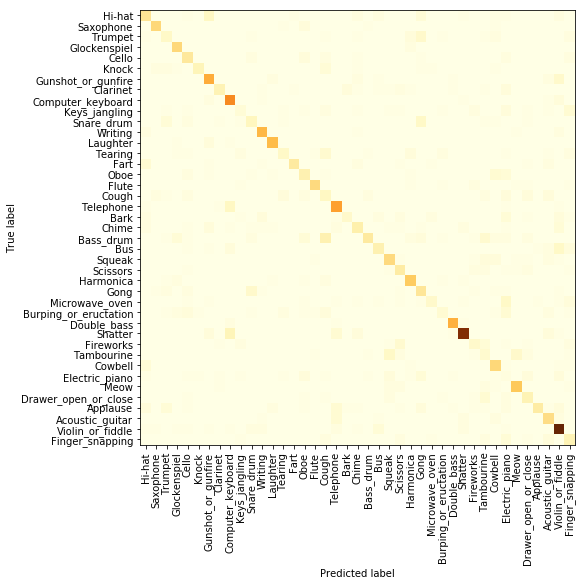

In [31]:
cm = confusion_matrix(y_test, y_gb)

plt.figure(figsize=(8, 8))

plt.imshow(cm, cmap=plt.cm.YlOrBr);

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

## Criando o modelo de regressão logística para verificar as melhores features:

In [32]:
from sklearn.linear_model import LogisticRegression

lmodel = LogisticRegression(penalty="l1", C=1e-2)

lmodel.fit(x_train, y_train)
yl = lmodel.predict(x_test)
lacc = acc(y_test, yl)

lmodel.coef_

array([[ 0.        ,  0.        ,  0.        , ...,  0.01607328,
         0.291698  ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.11321784,
         0.        , -0.74665975],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.07794944,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.15526362,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01746448,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.2240109 ,
         0.        ,  0.        ]])